In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
import lineagevi as linvi
import torch

In [3]:
adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/adata_with_velocity.h5ad')

In [4]:
model = linvi.trainer.LineageVI(
        adata,
        n_hidden=128,
        mask_key="I",
        gene_prior=True,
        seed=0,
        unspliced_key="unspliced",
        spliced_key="spliced",
    )

model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/vae_velocity_model.pt'
model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()

LineageVI(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=1805, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (mean_layer): Linear(in_features=128, out_features=647, bias=True)
    (logvar_layer): Linear(in_features=128, out_features=647, bias=True)
  )
  (gene_decoder): MaskedLinearDecoder(
    (linear): Linear(in_features=647, out_features=1805, bias=True)
  )
  (velocity_decoder): VelocityDecoder(
    (shared_decoder): Sequential(
      (0): Linear(in_features=647, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (gp_velocity_decoder): Linear(in_features=128, out_features=647, bias=True)
    (gene_velocity_decoder): Sequential(
      (0): Linear(in_features=128, out_features=5415, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
    )
  )
)

In [5]:
adata_gp = model.build_gp_adata()

In [6]:
adata.layers['velocity'] *=-1
adata.obsm['velocity_gp'] *=-1

In [7]:
from lineagevi.plotting import top_gps_table

top_gps_table(adata_gp, celltype_key="clusters", categories="all", layer="velocity", n=10)

,gp,mean_activation,Pre-endocrine mean,Ductal mean,Alpha mean,Ngn3 high EP mean,Delta mean,Beta mean,Ngn3 low EP mean,Epsilon mean
1,LUPUS_VS_HEALTHY_DONOR_BCELL_D,-3.094171,-3.321866,-2.262820,-4.201990,-2.306076,-4.193894,-4.126754,-2.325562,-3.896852
2,FETAL_INTESTINE_CHROMAFFIN_CEL,-3.044950,-3.340118,-2.647013,-3.385398,-2.983582,-3.430068,-3.052274,-2.815935,-3.707838
3,FETAL_PANCREAS_ISLET_ENDOCRINE,-3.034743,-3.303543,-2.668615,-3.551924,-2.625526,-3.471111,-3.297383,-2.740750,-3.608379
4,REGULATION_OF_BETA_CELL_DEVELO,2.908218,2.967268,2.377805,3.887195,1.862042,3.901595,3.960096,2.442643,3.488787
5,FETAL_STOMACH_NEUROENDOCRINE_C,2.853153,3.012013,2.227175,3.717238,2.357127,3.778886,3.375676,2.335831,3.868023
6,FETAL_CEREBELLUM_VASCULAR_ENDO,-2.838181,-3.060342,-1.982036,-4.017994,-1.861143,-4.179781,-4.033347,-2.031733,-3.707896
7,MATURITY_ONSET_DIABETES_OF_THE,2.799708,3.090856,2.022028,3.827392,1.975683,3.810057,3.747335,2.068958,3.753268
8,UNTREATED_VS_IL2_TREATED_CD8_T,2.761113,3.021739,1.677063,4.155909,1.761078,4.222304,4.153930,1.737918,3.834806
9,RB1_TARGETS_UP,2.730896,3.091391,1.954849,3.757464,1.740899,3.754820,3.850761,1.999779,3.415900
10,MAIN_FETAL_ISLET_ENDOCRINE_CEL,-2.634627,-2.955128,-2.249629,-3.161468,-2.000928,-3.174554,-3.112112,-2.329791,-3.171343


In [8]:
top_gps_table(adata_gp, celltype_key="clusters", categories=["Ductal", 'Beta'], layer="velocity", n=30)

,gp,mean_activation,Ductal mean,Beta mean
1,REGULATION_OF_BETA_CELL_DEVELO,2.998333,2.377805,3.960096
2,LUPUS_VS_HEALTHY_DONOR_BCELL_D,-2.993799,-2.262820,-4.126754
3,FETAL_PANCREAS_ISLET_ENDOCRINE,-2.915199,-2.668615,-3.297383
4,FETAL_INTESTINE_CHROMAFFIN_CEL,-2.805944,-2.647013,-3.052274
5,FETAL_CEREBELLUM_VASCULAR_ENDO,-2.786499,-1.982036,-4.033347
6,MATURITY_ONSET_DIABETES_OF_THE,2.698642,2.022028,3.747335
7,RB1_TARGETS_UP,2.698370,1.954849,3.850761
8,FETAL_STOMACH_NEUROENDOCRINE_C,2.677579,2.227175,3.375676
9,UNTREATED_VS_IL2_TREATED_CD8_T,2.648417,1.677063,4.153930
10,MAIN_FETAL_ISLET_ENDOCRINE_CEL,-2.587870,-2.249629,-3.112112


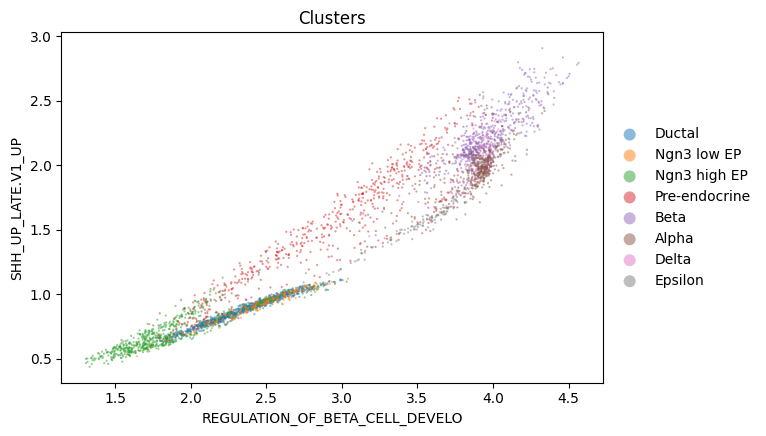

In [9]:
sc.pl.scatter(adata_gp, x='REGULATION_OF_BETA_CELL_DEVELO',y='SHH_UP_LATE.V1_UP', color='clusters', layers='velocity', size=10, alpha=0.5, title='Clusters')

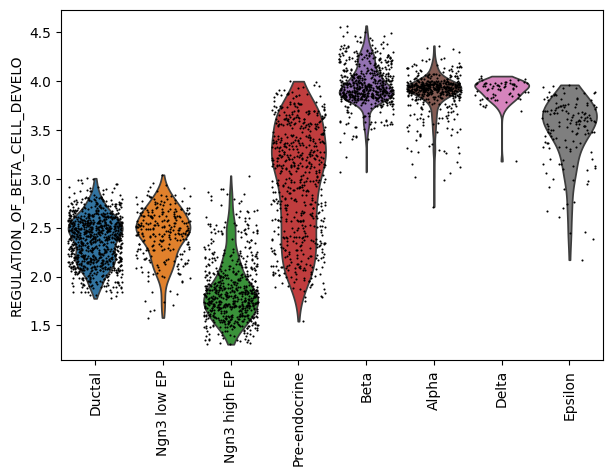

In [10]:
sc.pl.violin(adata_gp, keys="REGULATION_OF_BETA_CELL_DEVELO", layer='velocity', groupby="clusters", rotation=90, stripplot=True, jitter=0.4, size=1.5)

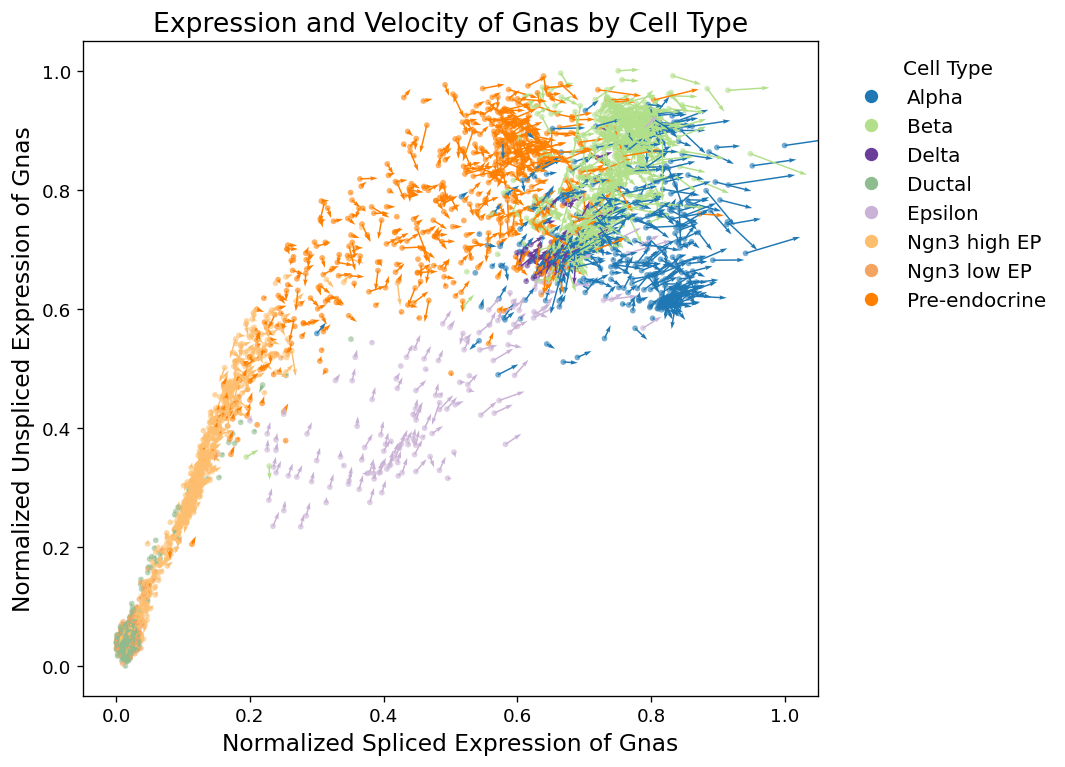

(<Figure size 1080x780 with 1 Axes>,
 <Axes: title={'center': 'Expression and Velocity of Gnas by Cell Type'}, xlabel='Normalized Spliced Expression of Gnas', ylabel='Normalized Unspliced Expression of Gnas'>)

In [11]:
from lineagevi.plotting import plot_phase_plane
plot_phase_plane(adata, 'Gnas', u_scale=.1, s_scale=.1, alpha=1, head_width=0.02, head_length=0.03, length_includes_head=False)

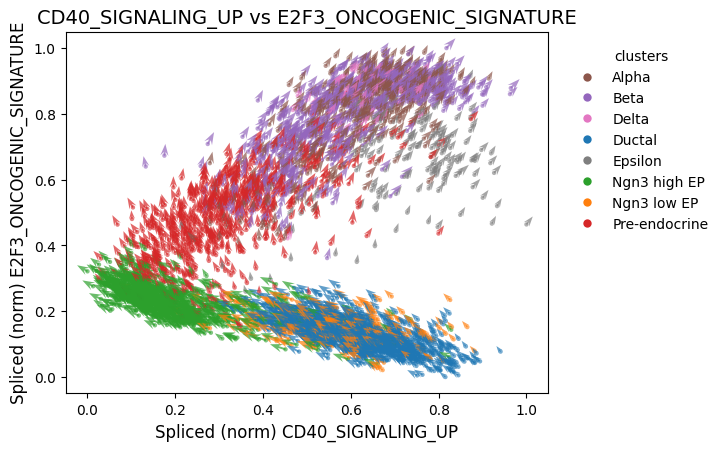

(<Figure size 1040x440 with 2 Axes>,
 array([[<Axes: title={'center': 'CD40_SIGNALING_UP vs E2F3_ONCOGENIC_SIGNATURE'}, xlabel='Spliced (norm) CD40_SIGNALING_UP', ylabel='Spliced (norm) E2F3_ONCOGENIC_SIGNATURE'>,
         <Axes: >]], dtype=object))

In [12]:
from lineagevi.plotting import plot_gp_phase_planes
plot_gp_phase_planes(adata_gp, program_pairs=[("CD40_SIGNALING_UP", "E2F3_ONCOGENIC_SIGNATURE")])

In [ ]:
model.latent_enrich(adata, groups='clusters', comparison='rest', n_sample=5000, key_added='bf_scores')

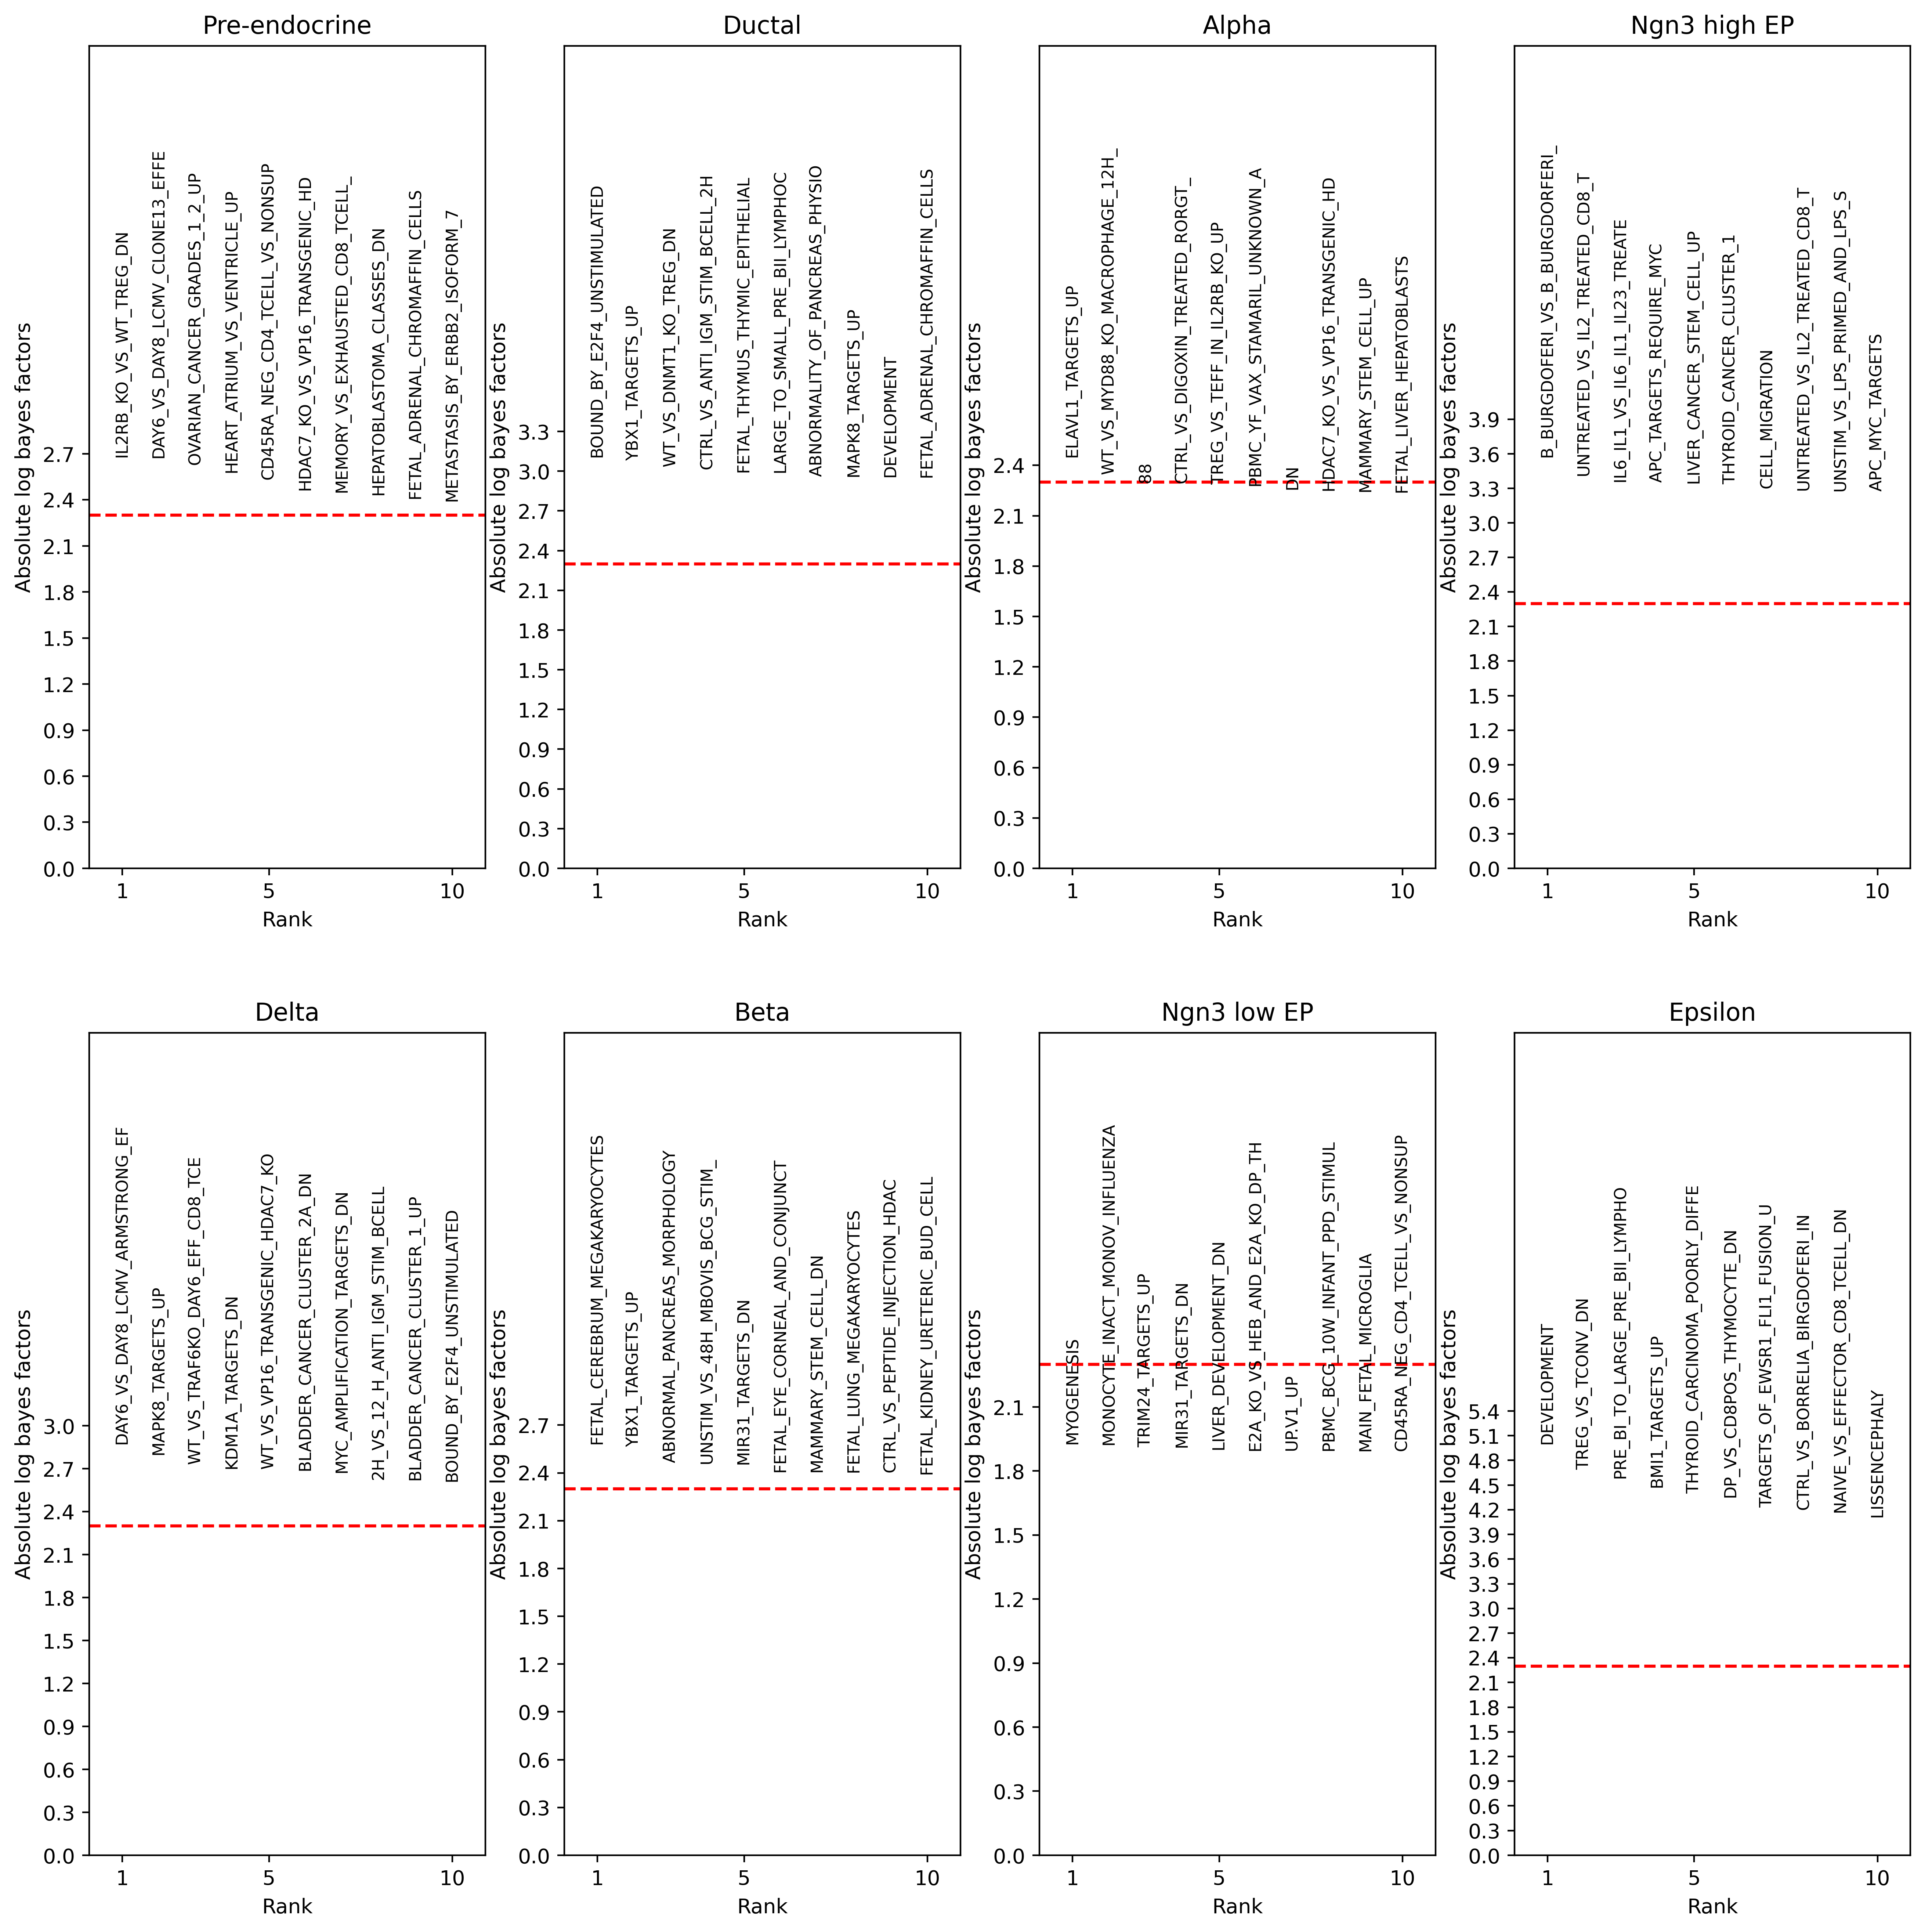

In [ ]:
linvi.plotting.plot_abs_bfs(adata, scores_key='bf_scores', n_cols=4, n_points=10, lim_val=2.3, fontsize=8, scale_y=2, yt_step=0.3,
                    title=None, figsize=None, dpi=400)